In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
sells_url = 'https://raw.githubusercontent.com/santimcs/obsidian-git-sync/main/Data/sells.csv'
buys_url = 'https://raw.githubusercontent.com/santimcs/obsidian-git-sync/main/Data/buys.csv'
stocks_url = 'https://raw.githubusercontent.com/santimcs/obsidian-git-sync/main/Data/stocks.csv'
dividends_url = 'https://raw.githubusercontent.com/santimcs/obsidian-git-sync/main/Data/dividends.csv'

sells = pd.read_csv(sells_url)
buys = pd.read_csv(buys_url)
stocks = pd.read_csv(stocks_url)
dividends = pd.read_csv(dividends_url)

In [2]:
pd.options.display.float_format = '{:,.2f}'.format
# Merge the dataframes
sales = sells.merge(buys, left_on='buy_id', right_on='id', suffixes=('_sell', '_buy'))
sales = sales.merge(stocks, left_on='stock_id', right_on='id', suffixes=('_sales', '_stock'))
# Extract the year from the 'date_sell' column
sales['date_sell'] = pd.to_datetime(sales['date_sell'])
sales['year'] = sales['date_sell'].dt.year
# Display the merged dataframe
sales.head()

,id_sell,buy_id,date_sell,amt_sell,net_sell,days,profit,percent,yearly,dividend_id,...,stock_id,date_buy,qty,amt_buy,net_buy,kind,id,name,market,year
0,1034,1266,2023-06-23,"32,100.00","32,028.90",3,"1,361.13",4.44,539.99,0,...,129,2023-06-20,3000,"30,600.00","30,667.77",HD,129,CPNREIT,SET999,2023
1,620,468,2018-02-06,"604,800.00","603,460.42",1687,"155,079.49",34.59,7.48,0,...,129,2013-06-25,27000,"447,390.00","448,380.93",DIV,129,CPNREIT,SET999,2018
2,540,664,2020-03-13,"83,250.00","83,065.61",91,"-4,878.74",-5.55,-22.25,0,...,129,2019-12-13,3000,"87,750.00","87,944.35",DIV,129,CPNREIT,SET999,2020
3,539,662,2020-03-13,"83,250.00","83,065.61",95,"-11,643.70",-12.29,-47.24,0,...,129,2019-12-09,3000,"94,500.00","94,709.31",DIV,129,CPNREIT,SET999,2020
4,538,654,2020-03-13,"111,000.00","110,754.15",123,"-17,529.36",-13.66,-40.55,0,...,129,2019-11-11,4000,"128,000.00","128,283.51",DIV,129,CPNREIT,SET999,2020


### Sales Analysis

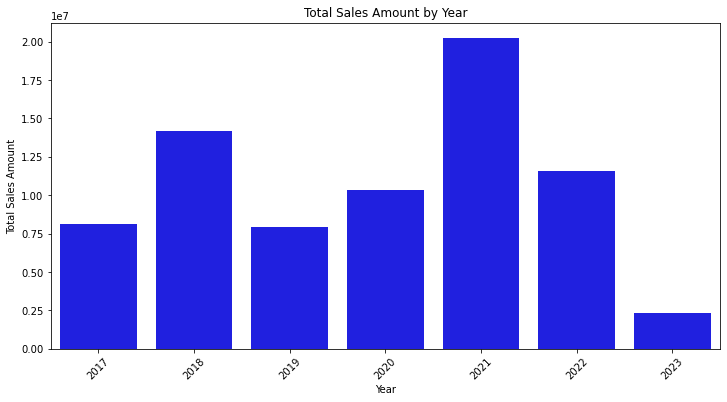

In [3]:
# Calculate the total sales amount by year
sales_amount_by_year = sales.groupby('year')['amt_sell'].sum()

# Create a bar plot for the total sales amount by year
plt.figure(figsize=(12, 6))
sns.barplot(x=sales_amount_by_year.index, y=sales_amount_by_year.values, color='blue')
plt.title('Total Sales Amount by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.show()

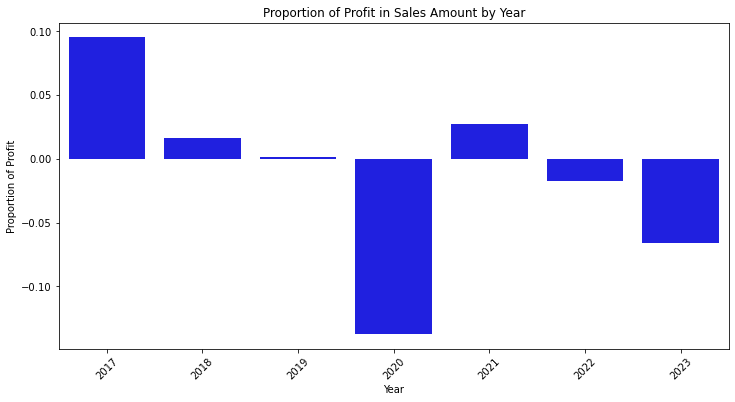

In [4]:
# Calculate the total profit by year
total_profit_by_year = sales.groupby('year')['profit'].sum()

# Calculate the proportion of profit in sales amount by year
profit_proportion_by_year = total_profit_by_year / sales_amount_by_year

# Create a bar plot for the proportion of profit in sales amount by year
plt.figure(figsize=(12, 6))
sns.barplot(x=profit_proportion_by_year.index, y=profit_proportion_by_year.values, color='blue')
plt.title('Proportion of Profit in Sales Amount by Year')
plt.xlabel('Year')
plt.ylabel('Proportion of Profit')
plt.xticks(rotation=45)
plt.show()

In [27]:
total_profit_by_year.to_frame()

,profit
year,
2017,"772,818.01"
2018,"223,705.73"
2019,"11,250.02"
2020,"-1,415,394.27"
2021,"545,103.35"
2022,"-201,413.37"
2023,"-154,538.51"


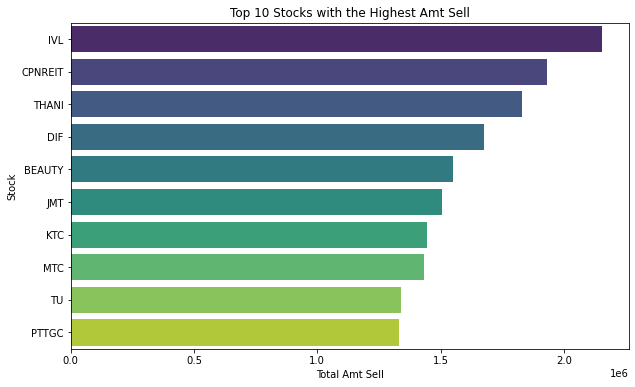

In [5]:
# Calculate the total amt sell per stock
total_amt_sell_per_stock = sales.groupby('name')['amt_sell'].sum().sort_values(ascending=False)

# Get the top 10 stocks with the highest total amt sell
top_10_stocks = total_amt_sell_per_stock.head(10)

# Create a bar plot for the top 10 stocks with the highest total amt sell
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_stocks.values, y=top_10_stocks.index, palette='viridis')
plt.title('Top 10 Stocks with the Highest Amt Sell')
plt.xlabel('Total Amt Sell')
plt.ylabel('Stock')
plt.show()

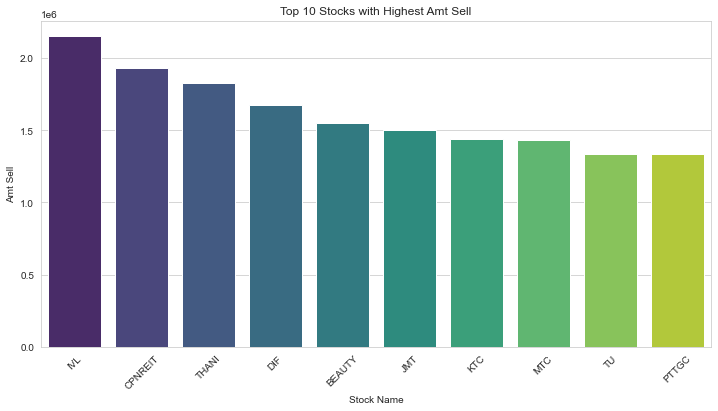

In [6]:
# Set the style of the visuals
sns.set_style('whitegrid')
# Calculate the total amt sell per stock
total_amt_sell_per_stock = sales.groupby('name')['amt_sell'].sum().sort_values(ascending=False)

# Get the top 10 stocks with the highest total amt sell
top_10_stocks = total_amt_sell_per_stock.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_stocks.index, y=top_10_stocks.values, palette='viridis')
plt.title('Top 10 Stocks with Highest Amt Sell')
plt.xlabel('Stock Name')
plt.ylabel('Amt Sell')
plt.xticks(rotation=45)
plt.show()

In [7]:
top_10_stocks.to_frame()

,amt_sell
name,
IVL,"2,153,600.00"
CPNREIT,"1,929,400.00"
THANI,"1,827,500.00"
DIF,"1,676,000.00"
BEAUTY,"1,550,300.00"
JMT,"1,503,775.00"
KTC,"1,443,000.00"
MTC,"1,430,425.00"
TU,"1,338,200.00"


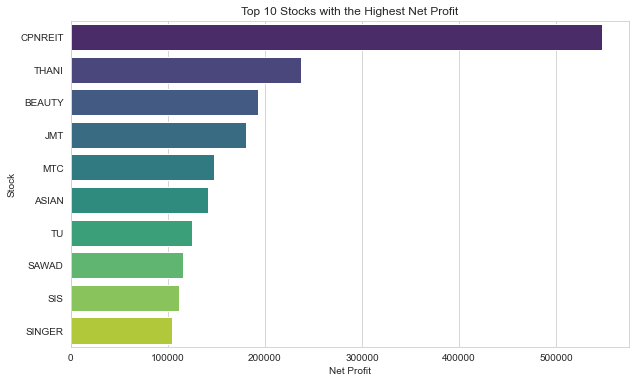

In [8]:
# Calculate the total net profit per stock
total_net_profit_per_stock = sales.groupby('name')['profit'].sum().sort_values(ascending=False)

# Get the top 10 stocks with the highest net profit
top_10_stocks = total_net_profit_per_stock.head(10)

# Create a bar plot for the top 10 stocks with the highest net profit
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_stocks.values, y=top_10_stocks.index, palette='viridis')
plt.title('Top 10 Stocks with the Highest Net Profit')
plt.xlabel('Net Profit')
plt.ylabel('Stock')
plt.show()

In [9]:
top_10_stocks.to_frame()

,profit
name,
CPNREIT,"547,131.19"
THANI,"237,046.32"
BEAUTY,"192,974.08"
JMT,"180,878.07"
MTC,"147,177.71"
ASIAN,"141,685.61"
TU,"125,061.53"
SAWAD,"115,506.59"
SIS,"110,986.74"


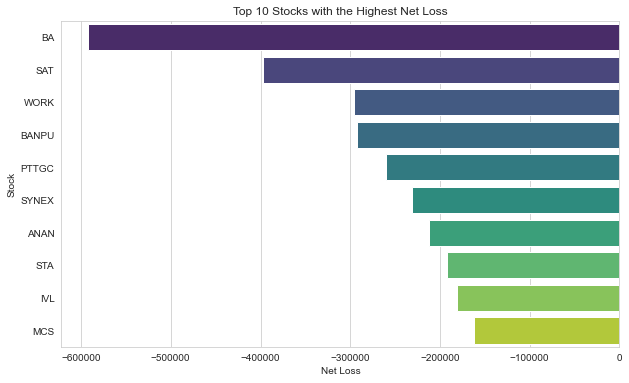

In [10]:
# Calculate the total net loss per stock
total_net_loss_per_stock = sales[sales['profit'] < 0].groupby('name')['profit'].sum().sort_values()

# Get the top 10 stocks with the highest net loss
top_10_stocks_with_highest_net_loss = total_net_loss_per_stock.head(10)

# Create a bar plot for the top 10 stocks with the highest net loss
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_stocks_with_highest_net_loss.values, y=top_10_stocks_with_highest_net_loss.index, palette='viridis')
plt.title('Top 10 Stocks with the Highest Net Loss')
plt.xlabel('Net Loss')
plt.ylabel('Stock')
plt.show()

In [11]:
top_10_stocks_with_highest_net_loss.to_frame()

,profit
name,
BA,"-592,225.03"
SAT,"-397,317.50"
WORK,"-295,292.41"
BANPU,"-292,448.55"
PTTGC,"-260,539.98"
SYNEX,"-231,329.18"
ANAN,"-212,334.18"
STA,"-191,932.38"
IVL,"-181,457.70"


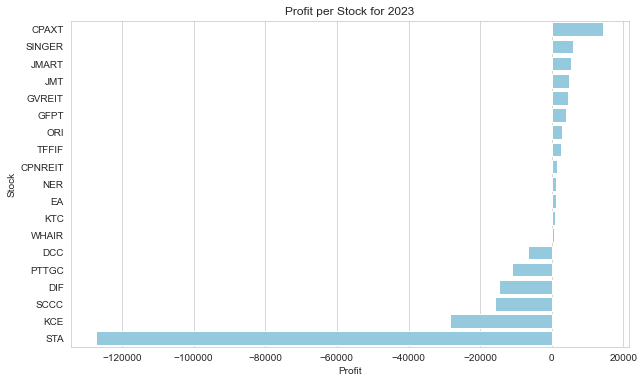

In [12]:
# Filter the sales for the year 2023
sales_2023 = sales[sales['date_sell'].dt.year == 2023]

# Calculate the average profit per stock for the year 2023
profit_per_stock_2023 = sales_2023.groupby('name')['profit'].sum().sort_values(ascending=False)

# Create a bar chart for the average profit per stock for the year 2023
plt.figure(figsize=(10, 6))
sns.barplot(x=profit_per_stock_2023.values, y=profit_per_stock_2023.index, color='skyblue')
plt.title('Profit per Stock for 2023')
plt.xlabel('Profit')
plt.ylabel('Stock')
plt.show()

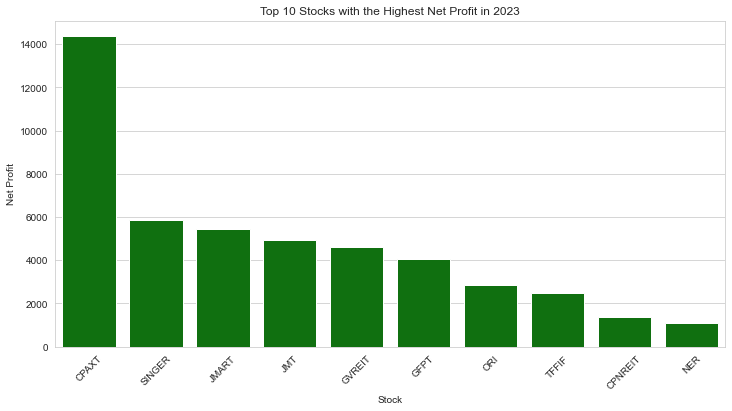

In [28]:
# Filter the sales data for the year 2023
sales_2023 = sales[sales['year'] == 2023]
# Calculate the net profit for each stock in 2023
net_profit_by_stock_2023 = sales_2023.groupby('name')['profit'].sum()

# Get the top 10 stocks with the highest net profit in 2023
top_10_stocks_2023 = net_profit_by_stock_2023.nlargest(10)

# Create a bar plot for the top 10 stocks with the highest net profit in 2023
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_stocks_2023.index, y=top_10_stocks_2023.values, color='green')
plt.title('Top 10 Stocks with the Highest Net Profit in 2023')
plt.xlabel('Stock')
plt.ylabel('Net Profit')
plt.xticks(rotation=45)
plt.show()

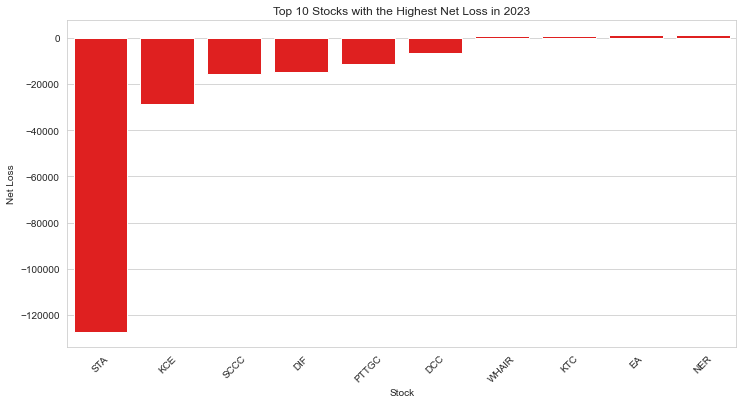

In [14]:
# Get the top 10 stocks with the highest net loss in 2023
top_10_stocks_loss_2023 = net_profit_by_stock_2023.nsmallest(10)

# Create a bar plot for the top 10 stocks with the highest net loss in 2023
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_stocks_loss_2023.index, y=top_10_stocks_loss_2023.values, color='red')
plt.title('Top 10 Stocks with the Highest Net Loss in 2023')
plt.xlabel('Stock')
plt.ylabel('Net Loss')
plt.xticks(rotation=45)
plt.show()

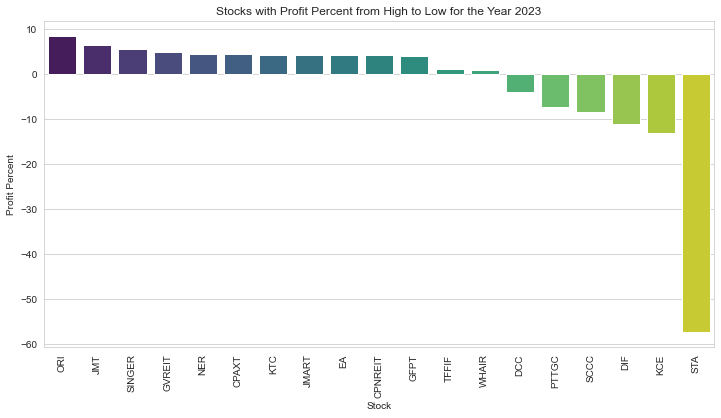

In [29]:
# Filter the sales data for the year 2023
sales_2023 = sales[sales['year'] == 2023]
# Calculate the profit percent for each stock in 2023
profit_percent_by_stock_2023 = (sales_2023.groupby('name')['profit'].sum() / sales_2023.groupby('name')['amt_sell'].sum()) * 100

# Sort the stocks by profit percent from high to low
profit_percent_by_stock_2023_sorted = profit_percent_by_stock_2023.sort_values(ascending=False)

# Create a bar plot for the stocks with profit percent from high to low for the year 2023
plt.figure(figsize=(12, 6))
sns.barplot(x=profit_percent_by_stock_2023_sorted.index, y=profit_percent_by_stock_2023_sorted.values, palette='viridis')
plt.title('Stocks with Profit Percent from High to Low for the Year 2023')
plt.xlabel('Stock')
plt.ylabel('Profit Percent')
plt.xticks(rotation=90)
plt.show()

In [30]:
# Display the profit percent by stock in 2023 in a table format
profit_percent_by_stock_2023_sorted.to_frame().reset_index().rename(columns={'name': 'Stock', 0: 'Profit Percent'})

,Stock,Profit Percent
0,ORI,8.51
1,JMT,6.42
2,SINGER,5.55
3,GVREIT,4.89
4,NER,4.53
5,CPAXT,4.51
6,KTC,4.33
7,JMART,4.33
8,EA,4.25
9,CPNREIT,4.24


### Dividend Analysis

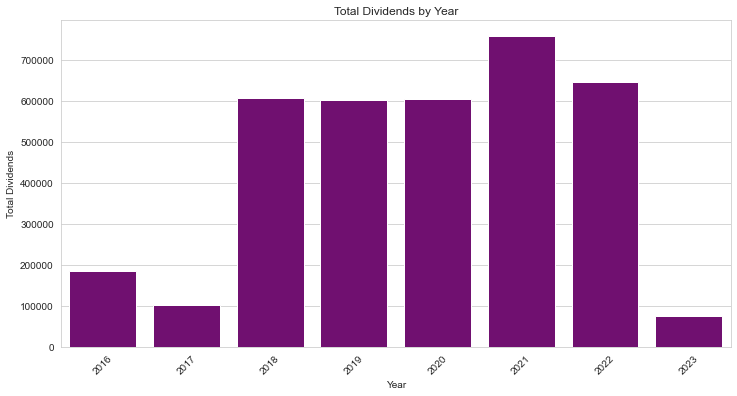

In [31]:
# Calculate the total dividends by year
dividends_by_year = dividends.groupby('year')['amt'].sum()

# Create a bar plot for the total dividends by year
plt.figure(figsize=(12, 6))
sns.barplot(x=dividends_by_year.index, y=dividends_by_year.values, color='purple')
plt.title('Total Dividends by Year')
plt.xlabel('Year')
plt.ylabel('Total Dividends')
plt.xticks(rotation=45)
plt.show()

In [32]:
dividends_by_year.to_frame()

,amt
year,
2016,"185,537.60"
2017,"102,343.50"
2018,"605,859.60"
2019,"601,462.95"
2020,"603,486.53"
2021,"758,673.21"
2022,"646,064.60"
2023,"74,374.00"


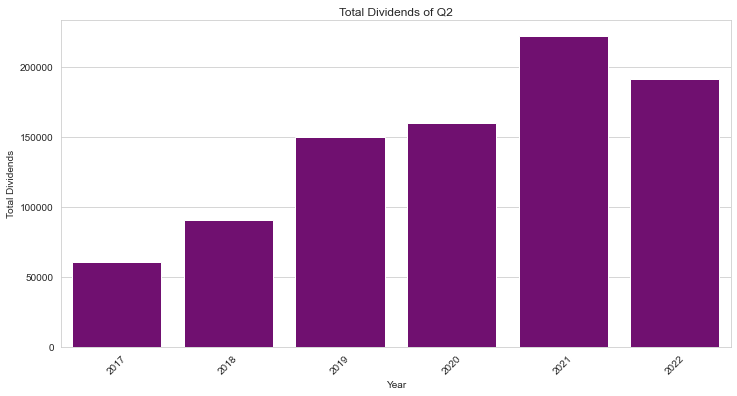

In [19]:
# Filter the dividends data for the year 2023
dividends_of_q2 = dividends[dividends['quarter'] == 2]
# Calculate the total dividends by year
dividends_by_qtr = dividends_of_q2.groupby('year')['amt'].sum()

# Create a bar plot for the total dividends by qtr
plt.figure(figsize=(12, 6))
sns.barplot(x=dividends_by_qtr.index, y=dividends_by_qtr.values, color='purple')
plt.title('Total Dividends of Q2')
plt.xlabel('Year')
plt.ylabel('Total Dividends')
plt.xticks(rotation=45)
plt.show()

In [33]:
dividends_by_qtr.to_frame()

,amt
year,
2017,"60,443.50"
2018,"90,770.00"
2019,"150,239.30"
2020,"159,687.93"
2021,"222,239.40"
2022,"191,060.60"


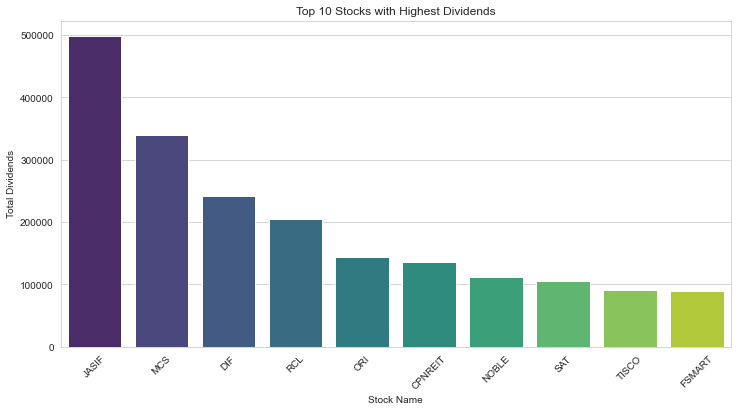

In [34]:
# Calculate the total dividends by stock
dividends_by_stock = dividends.groupby('name')['amt'].sum()

# Get the top 10 stocks with the highest dividends
top_10_dividend_stocks = dividends_by_stock.sort_values(ascending=False).head(10)

# Create a bar plot for the top 10 stocks with the highest dividends
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_dividend_stocks.index, y=top_10_dividend_stocks.values, palette='viridis')
plt.title('Top 10 Stocks with Highest Dividends')
plt.xlabel('Stock Name')
plt.ylabel('Total Dividends')
plt.xticks(rotation=45)
plt.show()

In [35]:
top_10_dividend_stocks.to_frame()

,amt
name,
JASIF,"498,200.00"
MCS,"339,050.00"
DIF,"241,639.50"
RCL,"204,000.00"
ORI,"144,350.00"
CPNREIT,"135,443.00"
NOBLE,"112,200.00"
SAT,"105,300.00"
TISCO,"91,400.00"


In [42]:
# Calculate the total profit
total_profit = sales['profit'].sum()
formatted_amt = '{:,.2f}'.format(total_profit)
print(formatted_amt)

-218,469.04


In [41]:
# Calculate the total dividends
total_dividends = dividends['amt'].sum()
formatted_amt = '{:,.2f}'.format(total_dividends)
print(formatted_amt)

3,577,801.99


### By market

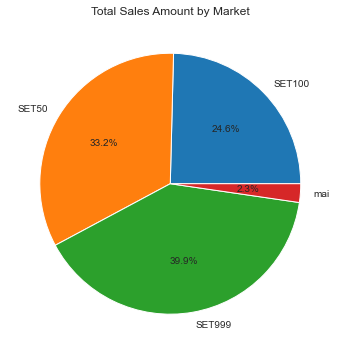

In [25]:
# Calculate the total sales amount by market
sales_amount_by_market = sales.groupby('market')['amt_sell'].sum()

# Create a pie chart of total sales amount by market
plt.figure(figsize=(10, 6))
plt.pie(sales_amount_by_market, labels=sales_amount_by_market.index, autopct='%1.1f%%')
plt.title('Total Sales Amount by Market')
plt.show()

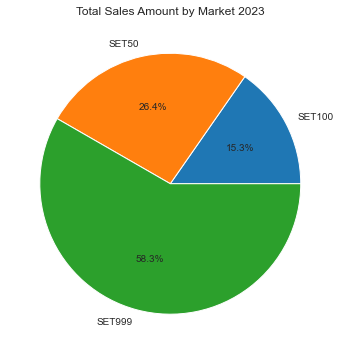

In [26]:
# Filter the sales data for the year 2023
sales_2023 = sales[sales['date_sell'].dt.year == 2023]
# Calculate the total sales amount by market
sales_amount_by_market_2023 = sales_2023.groupby('market')['amt_sell'].sum()

# Create a pie chart of total sales amount by market
plt.figure(figsize=(10, 6))
plt.pie(sales_amount_by_market_2023, labels=sales_amount_by_market_2023.index, autopct='%1.1f%%')
plt.title('Total Sales Amount by Market 2023')
plt.show()